In [47]:
import pandas as pd

data_path = 'PRSA_data_2010.1.1-2014.12.31.csv'
df = pd.read_csv(data_path)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [48]:
df.dropna(subset=['pm2.5'], inplace=True)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [50]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr




X = df[['DEWP', 'PRES',"TEMP", 'Iws', 'Is', 'Ir']]
y = df['pm2.5']


correlation_matrix = X.corrwith(y)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Correlation with PM2.5:")
print(correlation_matrix)
print("\nVIF:")
print(vif_data)

Correlation with PM2.5:
DEWP    0.171423
PRES   -0.047282
TEMP   -0.090534
Iws    -0.247784
Is      0.019266
Ir     -0.051369
dtype: float64

VIF:
  Variable       VIF
0     DEWP  3.603119
1     PRES  3.805479
2     TEMP  6.627388
3      Iws  1.391577
4       Is  1.021636
5       Ir  1.047169


In [51]:

correlation_matrix = X.corr()

# 打印相关性矩阵
print("Correlation matrix:")
print(correlation_matrix)


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印方差膨胀因子
print("\nVIF:")
print(vif_data)

high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_features.add(correlation_matrix.columns[i])

# 打印需要删除的特征
print("\nHighly correlated features to remove:", high_correlation_features)

Correlation matrix:
          DEWP      PRES      TEMP       Iws        Is        Ir
DEWP  1.000000 -0.777722  0.823821 -0.293106 -0.034925  0.125341
PRES -0.777722  1.000000 -0.826903  0.178871  0.070537 -0.080532
TEMP  0.823821 -0.826903  1.000000 -0.149613 -0.094785  0.049544
Iws  -0.293106  0.178871 -0.149613  1.000000  0.022630 -0.009157
Is   -0.034925  0.070537 -0.094785  0.022630  1.000000 -0.009764
Ir    0.125341 -0.080532  0.049544 -0.009157 -0.009764  1.000000

VIF:
  Variable       VIF
0     DEWP  3.603119
1     PRES  3.805479
2     TEMP  6.627388
3      Iws  1.391577
4       Is  1.021636
5       Ir  1.047169

Highly correlated features to remove: {'TEMP'}


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

# 多元线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_multi = lr.predict(X_test)
mse_multi = mean_squared_error(y_test, y_pred_multi)

# 多项式回归：以第一个特征为例
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train[['DEWP']])
X_poly_test = poly_features.transform(X_test[['DEWP']])

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

mse_multi, mse_poly

(8077.515245898382, 8258.91290560826)

In [38]:
from sklearn.metrics import r2_score
r2_multi = r2_score(y_test, y_pred_multi)
r2_multi

0.08330006402844259

In [39]:
r2_poly= r2_score(y_test, y_pred_poly)
r2_poly

0.06271363144623554

In [41]:
import numpy as np

In [42]:
# 确保数据没有缺失值
pm25_data = df['pm2.5'].values.reshape(-1, 1)

# 归一化PM2.5读数
scaler = MinMaxScaler(feature_range=(0, 1))
pm25_scaled = scaler.fit_transform(pm25_data)

# 创建序列
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 500  
X, y = create_sequences(pm25_scaled, sequence_length)

X.shape, y.shape

((41257, 500, 1), (41257, 1))

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam



In [44]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=64)


loss = model.evaluate(X_test, y_test)

print(f'Test loss: {loss}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 498, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 249, 64)           0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 50)                23000     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23307 (91.04 KB)
Trainable params: 23307 (91.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
413/413 [==============================] - 43s 102ms/step - loss: 0.0018 

258/258 [==============================] - 6s 23ms/step


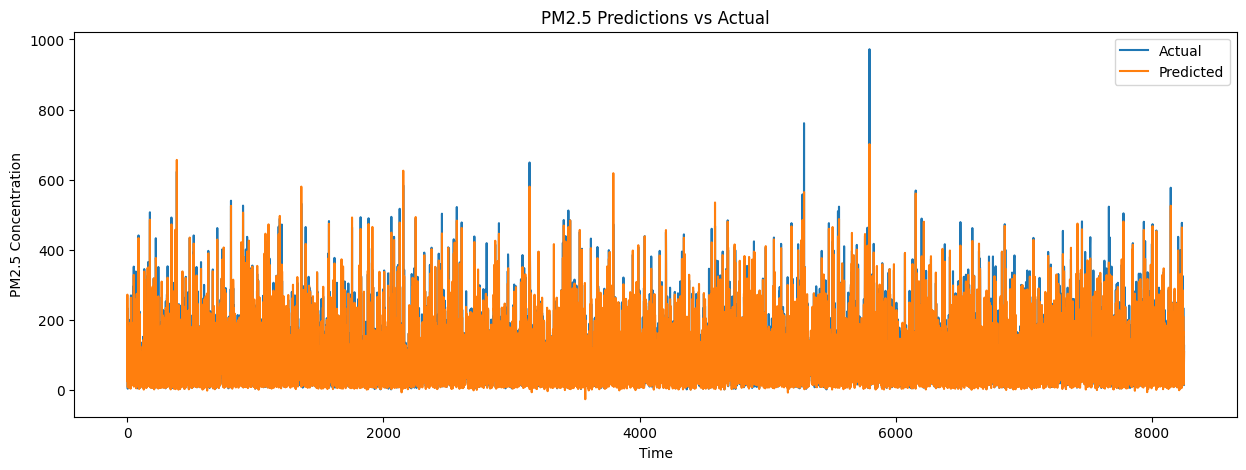

In [45]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)


y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)


plt.figure(figsize=(15, 5))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('PM2.5 Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test_original, y_pred_original)


r2 = r2_score(y_test_original, y_pred_original)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 499.54059369112383
R²: 0.9401709814042618
